## Visualizations χρησιμοποιώντας βιβλιοθήκες της Python

Οι βασικές βιβλιοθήκες της Python που σχετίζονται με visualizations είναι οι [matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/) και [plotly](https://plotly.com/python/). Εξ αυτών, η seaborn είναι μια βιβλιοθήκη η οποία έχει γραφτεί «επάνω» στη matplotlib με σκοπό να προσφέρει πιο high-level γραφήματα που σχετίζονται με στατιστική (ας πούμε κάτι σαν επέκταση της matplotlib), ενώ η plotly είναι μια βιβλιοθήκη η οποία αξιοποιείται κυρίως για την κατασκευή interactive γραφημάτων (δηλαδή απευθύνεται σε χρήστες που θέλουν να απεικονίζουν γραφήματα στα πλαίσια κάποιας εφαρμογής και όχι συνοδευτικά σε κείμενα). Βάσει αυτών, η λογική προσέγγιση είναι να αφήσουμε την plotly στην άκρη (τουλάχιστον μέχρι τα journals της [APS](https://journals.aps.org/) να αρχίσουν να δέχονται interactive reports αντί για papers) και να εστιάσουμε περισσότερο στη matplotlib, δίνοντας στο τέλος ορισμένες συμβουλές και βασικές κατευθύνσεις για τη seaborn.

<u>Disclaimer</u>: *Παρότι εδώ θα ασχοληθούμε αυστηρά με το κομμάτι των visualizations, θεωρούμε πως ο αναγνώστης έχει μια επαφή - ακόμα και σε πολύ βασικό επίπεδο - με το βασικό συντακτικό της Python. Επιπλέον, βοηθά γενικά να υπάρχει μια βασική κατανόηση της βιβλιοθήκης [numpy](https://numpy.org/).*

### Μέρος Ι - Συλλέγοντας τα δεδομένα

Ο βέλτιστος τρόπος να μάθει κανείς είναι κάνοντας, επομένως θα ξεκινήσουμε την εισαγωγή μας με στόχο να απεικονίσουμε σε ένα γράφημα τη συνάρτηση

$$ f(x) = x-3\sin x-4, $$

για θετικές τιμές του $x$. Αρχικά, θα πρέπει να θυμόμαστε ότι για τον υπολογιστή δεν υφίσταται η έννοια μιας «συνεχούς γραμμής» όπως ίσως την έχουμε συνηθίσει στην καθημερινότητά μας. Αντιθέτως, χρειαζόμαστε ένα σύνολο σημείων τα οποία απεικονίζονται σε έναν 2D χώρο (τουλάχιστον στην προκείμενη περίπτωση, γιατί γενικά υπάρχουν και 3D plots). Έτσι, όσο πιο πυκνή είναι η διαμέριση του χώρου, τόσο πιο κοντά στην έννοια της συνεχούς γραμμής θα πλησιάζει και το προκύπτον plot. Ξεκινάμε λοιπόν κάνοντας import τη numpy, η οποία θα μας επιτρέψει να κατασκευάσουμε δύο arrays $\vec{x}$ και $\vec{y}$ τέτοιες, ώστε κάθε δυάδα $\left(x_i,y_i\right)$ να αποτελεί σημείο της γραφικής παράστασης της συνάρτησης $f$.

In [1]:
import numpy as np

x = np.arange(0,10,0.01)

Καλούμε τη μέθοδο `arange` της numpy, ώστε να κατασκευάσουμε arrays που θα περιέχουν ως πρώτο στοιχείο το 0 (πρώτο όρισμα της `arange`), ως δεύτερο στοιχείο το $0 + \delta$, ως τρίτο στοιχείο το $0 + 2\delta$, κ.ο.κ., όπου $\delta$ η διαμέριση που επιλέγουμε (τρίτο όρισμα της `arange`), μέχρι να φτάσουμε στην τιμή 10 (δεύτερο όρισμα της `arange`). Προφανώς, όσο πιο μικρή είναι η επιλεγόμενη τιμή του $\delta$, τόσο πιο πυκνή θα είναι και η διαμέριση.

Δεδομένου αυτού του array, προχωράμε στον ορισμό του αντίστοιχου $\vec{y}$-array, οι συνιστώσες του οποίου αντιστοιχούν στις τιμές $f(x)$. Αυτές κατασκευάζονται με τετριμμένο τρόπο, εφόσον ορίσουμε πρώτα τη συνάρτηση $f$:

In [2]:
def f(x):
    return x - 3*np.sin(x) - 4

y = f(x)

Με άλλα λόγια, οι τιμές των $y_i$ προκύπτουν εφαρμόζοντας την $f$ σε κάθε $x_i$.

Κάπου εδώ έχουμε συλλέξει τα δεδομένα που επιθυμούμε να απεικονίσουμε και ήρθε η ώρα να μιλήσουμε για την ουσία της υπόθεσης, δηλαδή την απεικόνισή τους.

<u>Σημείωση</u>: Προφανώς, σε ρεαλιστικές εφαρμογές δεν μας ενδιαφέρει η απεικόνιση γραφικών παραστάσεων, αλλά η απεικόνιση δεδομένων που έχουμε ήδη λάβει, για παράδειγμα από κάποιο πείραμα, ή στα πλαίσια κάποιας προσομοίωσης.

### Μέρος ΙΙ - Η προσέγγιση μέσω Pyplot

Η χρήση της matplotlib, την οποία κάνουμε import στο επόμενο κελί, μπορεί να γίνει πρακτικά ισοδύναμα μέσω δύο διαφορετικών τρόπων, καθένας εκ των οποίων έχει τα δικά του πλεονεκτήματα και μειονεκτήματα. Ο πρώτος αφορά στη χρήση του «βοηθού» **Pyplot**, ενώ ο δεύτερος είναι η λεγόμενη **αντικειμενοστραφής προσέγγιση**.

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Και οι δύο προσεγγίσεις έχουν ως κοινό σημείο εκκίνησης την κατασκευή αυτού που θα λέγαμε σύστημα αξόνων. Αξίζει να σημειωθεί πως εδώ ως σύστημα αξόνων δε νοούμε μόνο ένα ζεύγος ορθοκανονικών αξόνων, αλλά και άλλα αντικείμενα, όπως τον τίτλο του γραφήματος, ή κάποιο παράρτημά του. Στην περίπτωση του pyplot, το σύστημα αξόνων ορίζεται απλώς μέσω της εντολής `plt.figure()`, η οποία μπορεί να λάβει διάφορα ορίσματα, όπως είναι για παράδειγμα το μέγεθος που επιθυμούμε να έχει η εικόνα (βλ. επόμενο κελί).

<u>Σημείωση</u>: *Για την `figure()`, όπως και σε κάθε συνάρτηση ή μέθοδο που θα συναντήσουμε, αρκεί μια γενική ιδέα για τη λειτουργία της. Παρ' όλα αυτά, όταν αρχίσουμε να εξοικειωνόμαστε με τα βασικά του visualization και κληθούμε να ασχοληθούμε με τις λεπτομέρειες, ο μόνος δρόμος είναι το να ανατρέχουμε στο documentation κάθε συνάρτησης/μεθόδου, προκειμένου να έχουμε εποπτεία για όλα τα arguments που μπορεί να λάβει, για το τι δευτερεύοντες σκοπούς μπορεί να επιτελέσει, κ.ο.κ.*

Το επόμενο βήμα στην προσέγγιση μέσω pyplot είναι η κλήση κάποιας συνάρτησης η οποία να πραγματοποιεί την απεικόνιση που επιθυμούμε. Γενικά, υπάρχουν πολλές τέτοιες συναρτήσεις, ανάλογα με το είδος των δεδομένων που επιθυμούμε να απεικονίσουμε. Για παράδειγμα, εδώ μας ενδιαφέρουν κυρίως τα πιο συνήθη `scatter` και `plot`, με το πρώτο να απεικονίζει απλώς τα σημεία που διαθέτουμε σε ένα 2D χώρο, και το δεύτερο να κάνει ένα interpolation μιας γραμμής που τα ενώνει (αυτό που θα λέγαμε γραφική παράσταση δηλαδή). Παρ' όλα αυτά, υπάρχει μια σειρά από άλλες επιλογές, όπως το `bar` που κατασκευάζει ραβδογράμματα, το `contour` που κατασκευάζει contours σε δεδομένα της μορφής $(x,y,z)$, ή το `hist` που κατασκευάζει ιστογράμματα. Για μια πλήρη εποπτεία όλων των δυνατοτήτων για απεικονίσεις παραπέμπουμε [εδώ](https://matplotlib.org/stable/plot_types/index.html).

Στη δική μας περίπτωση θα επιλέξουμε την εντολή `plt.plot()`, προκειμένου να κατασκευάσουμε την επιθυμητή γραφική παράσταση. Τα βασικά της ορίσματα είναι τα arrays που περιλαμβάνουν τα σημεία προς απεικόνιση, όμως δεν περιορίζονται εκεί (ξανά, απευθυνθείτε στο documentation κάθε συνάρτησης/μεθόδου για να έχετε μια πλήρη εικόνα των δυνατοτήτων που σας παρέχουν).

Το τελικό βήμα είναι η απεικόνιση του γραφήματος, μέσω της εντολής `plt.show()`, η οποία είναι αρκετά self-explanatory. Συνθέτοντας τα παραπάνω μαζί, παίρνουμε το ακόλουθο.

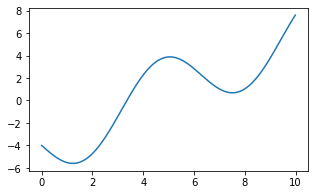

In [4]:
# Ορισμός αξόνων
plt.figure(figsize=(5, 3)) # το πρώτο όρισμα του figsize αφορά το μήκος, ενώ το δεύτερο το πλάτος

# Κλήση της plot για την απεικόνιση
plt.plot(x, y)

# Απεικόνιση του γραφήματος
plt.show()

Συνοψίζοντας, βλέπουμε πως με τρεις μόνο εντολές οι οποίες ανήκουν στον βοηθό pyplot μπορεί κανείς να αποκτήσει το επιθυμητό γράφημα. Φυσικά, το παραπάνω γράφημα είναι το πιο απλό που θα μπορούσαμε να έχουμε, αφού δεν το έχουμε «περιποιηθεί» αρκετά. Στο ακόλουθο κελί δείχνουμε μια εναλλακτική μορφή του ίδιου γραφήματος, όπου όμως έχουμε χρησιμοποιήσει το pyplot για να προσθέσουμε επιπλέον χαρακτηριστικά στους άξονές μας (υπενθυμίζουμε, εδώ με την έννοια «σύστημα αξόνων» δε μιλάμε για τους δύο άξονες αποκλειστικά, αλλά για το σύνολο του γραφήματος).

Η πρώτη προσθήκη είναι ένας τίτλος μέσω της `plt.title()`, ενώ η δεύτερη αφορά τίτλους για κάθε επιμέρους άξονας μέσω των `plt.xlabel()` και `plt.ylabel()`. Επιπλέον, στην `plt.plot()` που χρησιμοποιήθηκε και προηγουμένως προσθέσαμε δύο επιπλέον ορίσματα, ένα label και ένα color, τα οποία είναι μάλλον self-explanatory. Πρόσθετα, απεικονίσαμε το σχετικό grid μέσω της `plt.grid()`, προς διευκόλυνση ανάγνωσης του γραφήματος. Προσθέσαμε επίσης ένα παράρτημα μέσω της `plt.legend()`, στο οποίο φαίνονται όλα τα αντικείμενα στα οποία έχουμε προσδώσει κάποιο label. Τέλος, πέρα από το να απεικονίσουμε την εικόνα μέσω της `plt.show()`, την αποθηκεύσαμε τοπικά μέσω της `plt.savefig()`, ούτως ώστε να την αξιοποιήσουμε περαιτέρω (π.χ. ενσωματώνοντάς την σε κάποιο .tex αρχείο).

Θα σταθούμε για μια στιγμή στα ορίσματα της `plt.savefig()`. Το πρώτο δεν αφορά απλώς το όνομα με το οποίο θέλουμε να αποθηκευτεί η εικόνα, αλλά και το είδος του αρχείου, το οποίο προσδιορίζεται από την κατάληξη .pdf. Είναι σημαντικό οι εικόνες που κατασκευάζουμε να σώζονται με τη μορφή vector αρχείων (π.χ. .pdf, .eps, .svg, κτλ.), ούτως ώστε να μπορούμε να τις ενσωματώνουμε σε .pdf αρχεία (για παράδειγμα μέσω .tex) χωρίς να μας απασχολεί η ποιότητά τους. Σε αντίθεση με εικόνες τύπου .jpg ή .png, τα vector αρχεία δεν «πιξελιάζουν» όταν κάνουμε πολύ zoom - αντιθέτως μπορούμε να zoomάρουμε επ' αόριστον χωρίς να χαλάει η ποιότητά τους. Το δεύτερο όρισμα φροντίζει να αποκόψει όλα τα περιθώρια γύρω από την εικόνα, κρατώντας μόνο τα στοιχεία της εικόνας, επιτρέποντάς μας έτσι να τη φορτώσουμε απευθείας σε κάποιο .tex αρχείο χωρίς να κάνουμε «κοπτοραπτική». Εάν το όρισμα αυτό έλειπε, τότε η εικόνα θα αποθηκευόταν by default με ένα λευκό background περιμετρικά της (δοκιμάστε να τρέξετε το επόμενο κελί αφαιρώντας το δεύτερο αυτό όρισμα και δείτε με τα μάτια σας).

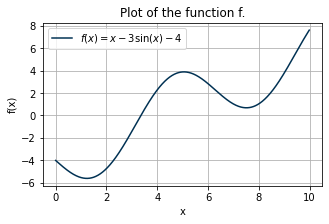

In [5]:
plt.figure(figsize=(5, 3))

# Τίτλος του γραφήματος
plt.title("Plot of the function f.")

# Τίτλοι των αξόνων
plt.xlabel("x") # άξονας x
plt.ylabel("f(x)") # άξονας y

# στην plot προσθέσαμε και ένα τρίτο όρισμα, το label, καθώς και ένα τέταρτο, το color
plt.plot(x, y, label=r'$f(x) = x-3\sin(x)-4$', color='#003153')

# προσθήκη ενός grid για διευκόλυνση
plt.grid()

# Απεικόνιση του παραρτήματος όπου φαίνονται όλα τα labels που έχουμε ορίσει
plt.legend()

# Αποθήκευση της εικόνας τοπικά με όνομα my_plot.pdf
plt.savefig("my_plot.pdf", bbox_inches='tight')

plt.show()

Κάτι επιπλέον που ίσως αξίζει να σημειωθεί είναι η χρήση ενός παραρτήματος (legend). Στην προκείμενη περίπτωση ίσως να φαίνεται εντελώς περιττό, όμως θα μπορούσαν στο ίδιο γράφημα να απεικονίζονται περισσότερες από μία γραφικές παραστάσεις. Τότε, το παράρτημα θα ήταν χρήσιμο, όπως φαίνεται στο παράδειγμα του ακόλουθου κελιού.

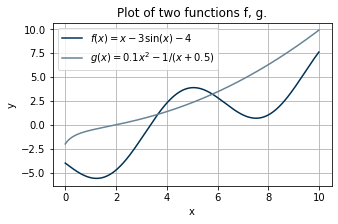

In [6]:
def g(x):
    return 0.1*x**2 - 1.0/(x+0.5)

plt.figure(figsize=(5, 3))

plt.title("Plot of two functions f, g.")
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x, y, label=r'$f(x) = x-3\sin(x)-4$', color='#003153') # f(x)
# Προσθήκη μιας επιπλέον γραφικής παράστασης στο ίδιο σύστημα αξόνων
plt.plot(x, g(x), label=r'$g(x) = 0.1x^2-1/(x+0.5)$', color='#668397') # g(x)

plt.grid()
plt.legend()

plt.savefig("my_plot_2.pdf", bbox_inches='tight')

plt.show()

Ένα εύλογο ερώτημα είναι «πώς στο καλό μπορούμε να θυμόμαστε όλες αυτές τις εντολές και τα αντίστοιχα ορίσματα;», στο οποίο η απάντηση είναι αρκετά απλή: δε μπορούμε. Με εξαίρεση την περίπτωση όπου τα visualizations είναι η ίδια μας η δουλειά, συνήθως θυμόμαστε κάποια βασικά πράγματα, συν/πλην μερικά ακόμα ανάλογα με την εμπειρία και τη συχνότητα χρήσης. Είναι αρκετά συνηθισμένο, όμως, να κατασκευάζει κανείς κάποιο γράφημα και μια μεταγενέστερη χρονική στιγμή να ανατρέχει στον κώδικα του γραφήματος αυτού και να τον κάνει copy/paste, προκειμένου να φτιάξει κάτι αντίστοιχο. Η ουσία εδώ (όπως και σε πολλά άλλα aspects του προγραμματισμού με Python) δεν έγκειται στο να θυμόμαστε ακριβώς πώς να κάνουμε τα πάντα, αλλά στο να ξέρουμε τις βασικές αρχές λειτουργίας τους και να είμαστε σε θέση να googlάρουμε το πώς γίνεται κάτι που έχουμε ξεχάσει ή και κάτι εντελώς καινούριο. Για παράδειγμα, μπορεί να μη θυμόμαστε το πώς προστίθεται ένα grid στο γράφημά μας, όμως μια αναζήτηση της μορφής "how to add grid in pyplot" μας καλύπτει μέσα σε λίγα δευτερόλεπτα.

Κλείνοντας τη συζήτηση για το pyplot, έχει καταστεί προφανές πως μια σειρά από εντολές της μορφής `plt.κάτι()` αρκούν προκειμένου να κατασκευάσουμε, να αποθηκεύσουμε και να απεικονίσουμε μια γραφική παράσταση. Αυτό ακριβώς είναι και το μεγάλο προτέρημα του pyplot: η απλότητά του. Παρ' όλα αυτά, για λόγους που θα εξηγήσουμε παρακάτω, καθώς και για λόγους που γίνονται αισθητοί μόνο με την εμπειρία, η προσέγγιση μέσω του βοηθού pyplot δεν είναι αυτή που προτείνουμε εδώ. Αντιθέτως, προτείνουμε τη λεγόμενη αντικειμενοστραφή προσέγγιση, την οποία θα αναλύσουμε ακολούθως.

### Μέρος IΙΙ - Η αντικειμενοστραφής προσέγγιση

Στα πλαίσια της αντικειμενοστραφούς προσέγγισης, αντί να στηριζόμαστε αποκλειστικά σε κλήσεις μεθόδων και συναρτήσεων του pyplot για να χτίσουμε με έναν κάπως αυτοματοποιημένο τρόπο το επιθυμητό γράφημα, ορίζουμε ρητά ένα σύνολο αξόνων μέσα σε μια ευρύτερη εικόνα και καλούμε συναρτήσεις και μεθόδους επάνω σε αυτά. Ίσως η πρόταση αυτή να φαίνεται αρκετά ασαφής, οπότε πάμε να τη δούμε με ένα παράδειγμα.

Θα ξεκινήσουμε κατασκευάζοντας το βασικό γράφημα της προηγούμενης ενότητας, ακολουθώντας τα ίδια τρία βήματα, αυτή τη φορά όμως χρησιμοποιώντας τη δεύτερη προσέγγιση. Αρχικά, ο ορισμός των αξόνων γίνεται χρησιμοποιώντας και πάλι την pyplot, μόνο που αυτή τη φορά αναθέτουμε ρητά σε δύο αντικείμενα, `fig` και `ax`, την εικόνα και το σύστημα αξόνων, αντίστοιχα. Σημειώνουμε πως αντί για την `plt.figure()` εδώ χρησιμοποιούμε την `plt.subplots()` για λόγους που θα γίνουν εμφανείς στη συνέχεια. Προς το παρόν, μας αρκεί το ότι επιτελούν τον ίδιο σκοπό.

Στη συνέχεια, αντί να καλέσουμε την `plt.plot()`, εφαρμόζουμε τη μέθοδο αυτή επάνω στο αντικείμενο με όνομα `ax` το οποίο ορίστηκε παραπάνω. Έτσι, δίνουμε την εντολή η γραφική παράσταση να κατασκευαστεί ακριβώς επάνω στο αντικείμενο `ax`, αντί να αφήσουμε την pyplot να αναλάβει όλη τη δουλειά από μόνη της, κάνοντας υποθέσεις για το «τι πάει πού».

Τέλος, χρησιμοποιούμε και πάλι την `plt.show()` για να απεικονίσουμε το γράφημά μας.

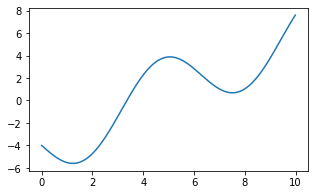

In [7]:
# Ορισμός αξόνων
fig, ax = plt.subplots(figsize=(5, 3)) # το πρώτο όρισμα του figsize αφορά το μήκος, ενώ το δεύτερο το πλάτος

# Εφαρμογή της plot στο αντικείμενο ax
ax.plot(x, y)

# Απεικόνιση του γραφήματος
plt.show()

Πράγματι, λαμβάνουμε το ίδιο γράφημα με πριν. Η μόνη, λοιπόν, διαφορά ανάμεσα στις δύο προσεγγίσεις είναι ότι η pyplot αναλαμβάνει να κάνει κάπως αυτοματοποιημένα τα πράγματα, ενώ μέσω της αντικειμενοστραφούς προσέγγισης πρέπει να ορίζουμε ρητά τι εφαρμόζεται και πού; Σε γενικές γραμμές, ναι. Τότε, για ποιο λόγο να ακολουθούμε την προσέγγιση που απαιτεί από εμάς περισσότερη σαφήνεια και ακρίβεια στους ορισμούς; Η απάντηση σε αυτό θα δοθεί μέσα από το επόμενο παράδειγμα.

Πολύ συχνά, θέλουμε να φτιάξουμε περισσότερες από μία γραφικές παραστάσεις, όχι όμως στο ίδιο σύστημα αξόνων. Εδώ ακριβώς είναι που έρχεται η χρήση του `subplots` που αναφέραμε προηγουμένως. Ας υποθέσουμε πως θέλουμε να κατασκευάσουμε δύο γραφήματα το ένα δίπλα στο άλλο, τα οποία συνιστούν μία ενιαία εικόνα. Τότε, η κατασκευή των αξόνων θα γίνει μέσω της γραμμής `fig, axes = plt.subplots(1, 2, figsize=(11, 3))` που φαίνεται στο ακόλουθο κελί. Η γραμμή αυτή ορίζει, όπως και πριν, την εικόνα που θέλουμε να κατασκευάσουμε, αναθέτοντάς της το όνομα `fig`. Τώρα, όμως, η `subplots()` έχει λάβει δύο επιπλέον ορίσματα πριν από το `figsize`. Το πρώτο όρισμα (ο αριθμός 1) αφορά στο πόσες γραμμές θέλουμε να έχει η συνολική μας εικόνα, ενώ το δεύτερο όρισμα (ο αριθμός 2) αφορά στο πόσες στήλες θέλουμε. Από τη στιγμή που στόχος μας είναι να κατασκευάσουμε δύο γραφήματα δίπλα-δίπλα, επιλέγουμε 1 γραμμή και 2 στήλες. Αυτός είναι και ο λόγος για τον οποίο το αντικείμενο που προηγουμένως ονομάσαμε `ax` έχει τώρα λάβει την ονομασία `axes` (κάτι σαν πληθυντικό αριθμό). Το αντικείμενο `axes` είναι τώρα μια λίστα (πιο σωστά, μια numpy array), το οποίο περιέχει τα επί μέρους συστήματα αξόνων, δηλαδή τα δύο γραφήματα που θέλουμε να φτιάξουμε στην προκείμενη περίπτωση.

Ας πούμε, λοιπόν, πως στο πρώτο γράφημα θέλουμε να σχεδιάσουμε τη γραφική παράσταση της $f(x)$, ενώ στο δεύτερο θέλουμε να σχεδιάσουμε τη γραφική παράσταση της $g(x)$. Μέσω της αντικειμενοστραφούς προσέγγισης, αφότου ορίσουμε την εικόνα και τους άξονές μας, ζητάμε ρητά να κατασκευαστεί μέσω της `plot` η κάθε γραφική παράσταση στο αντίστοιχο γράφημα. Κατά σύμβαση, ο πρώτος δείκτης της λίστας `axes` αφορά στο πρώτο γράφημα (αριστερά), ενώ ο δεύτερος δείκτης αφορά στο δεύτερο γράφημα (δεξιά). Τέλος, μέσω της `plt.show()` απεικονίζουμε την εικόνα μας, η οποία αποτελείται από δύο γραφήματα.

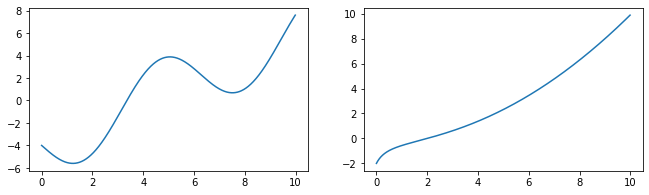

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(11, 3))

# Ο δείκτης 0 αντιστοιχεί στο πρώτο στοιχείο της λίστας, δηλαδή το αριστερό γράφημα
axes[0].plot(x, f(x))

# Ο δείκτης 1 αντιστοιχεί στο δεύτερο στοιχείο της λίστας, δηλαδή το δεξί γράφημα
axes[1].plot(x, g(x))

plt.show()

Κάπου εδώ, η υπεροχή της αντικειμενοστραφούς προσέγγισης αρχίζει να γίνεται εμφανής, καθώς ο τρόπος με τον οποίο η ίδια διαδικασία θα γινόταν μέσω του βοηθού pyplot δεν είναι τετριμμένη βάσει όσων παρουσιάστηκαν στην προηγούμενη ενότητα. Αντιθέτως, η αντικειμενοστραφής προσέγγιση γενικεύεται με τρόπο τετριμμένο στην περίπτωση όπου θέλουμε να κατασκευάσουμε μια εικόνα με ένα μόνο γράφημα. Στο ακόλουθο κελί κατασκευάζουμε τη δεύτερη εικόνα της προηγούμενης ενότητας, αυτή τη φορά χρησιμοποιώντας τη γλώσσα της δεύτερης προσέγγισης.

Ορίζουμε αρχικά την εικόνα και το σύστημα αξόνων, θέτοντας δύο άσσους ως πρώτα ορίσματα της `subplots` (ζητούμε, δηλαδή, 1 γραμμή και 1 στήλη). Όπως είδαμε παραπάνω, στην περίπτωση που έχουμε ένα μόνο γράφημα θα μπορούσαμε να παραλείψουμε και εντελώς τα δύο αυτά ορίσματα, είναι όμως χρήσιμο να τα γράφουμε και για λόγους debugging. Στη συνέχεια, με εξαίρεση τις εντολές που αφορούν ολόκληρη την εικόνα (π.χ. το `savefig()` ή το `show()`) αντί να καλούμε την pyplot, εφαρμόζουμε τις ίδιες μεθόδους με πριν επάνω στο αντικείμενο `ax`. Η μόνη διαφορά, είναι πως σε ορισμένες περιπτώσεις προστίθεται στη μέθοδο το πρόθεμα `set_` και έτσι, για παράδειγμα, το `plt.title()` γίνεται `ax.set_title()`. Και έτσι, προκύπτει ακριβώς το δεύτερο γράφημα της προηγούμενης ενότητας.

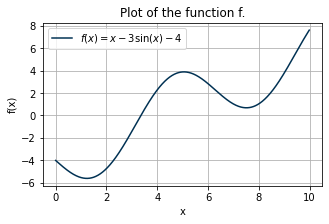

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title("Plot of the function f.")

ax.set_xlabel("x")
ax.set_ylabel("f(x)")

ax.plot(x, y, label=r'$f(x) = x-3\sin(x)-4$', color='#003153')

ax.grid()

ax.legend()

plt.savefig("my_plot_3.pdf", bbox_inches='tight')

plt.show()

Εάν σας εγείρονται ξανά ερωτήματα της μορφής «πώς θα θυμάμαι το ένα και το άλλο ξεχωριστά;», «πώς να σκεφτώ πού θα βάλω set και πού όχι;», κτλ., τότε η απάντηση είναι ίδια με πριν: μέχρι ένα σημείο είναι ζήτημα εμπειρίας, από αυτό το σημείο και μετά είναι googling skills. Εξάλλου, όπως δείξαμε, η αντικειμενοστραφής προσέγγιση απαιτεί μεν περισσότερους ρητούς ορισμούς, είναι όμως πιο γενική και άρα αρκεί να μάθουμε αυτήν και όχι και τις δύο προσεγγίσεις παράλληλα.

Για λόγους πληρότητας, παραθέτουμε παρακάτω και την περίπτωση μιας εικόνας που αποτελείται από 4 γραφήματα. Στην περίπτωση αυτή, το αντικείμενο `axes` είναι ξανά μία numpy array, έχει όμως 2 διαστάσεις (1 διάσταση που αφορά το δείκτη της γραμμής και 1 διάσταση που αφορά το δείκτη της στήλης). Προκειμένου να αποκτήσουμε μια σύντομη επαφή και με άλλες επιλογές γραφημάτων ή άλλα είδη γραφικών παραστάσεων, στο **μεθεπόμενο** κελί παραθέτουμε τον κώδικα που κατασκευάζει κάτι λίγο πιο σύνθετο απ' όσα είδαμε πριν (στο επόμενο κελί ορίζουμε σύντομα τα δεδομένα τα οποία θα απεικονίσουμε στα επί μέρους γραφήματα). Αξίζει να του ρίξετε μια προσεκτική ματιά, να προσέξετε τα σχόλια, να δείτε online documentation για πράγματα τα οποία δεν είχαμε δει παραπάνω και να δοκιμάσετε να «παίξετε», κάνοντας αλλαγές της επιλογής σας.

In [10]:
# ----------------------------------------------
# Δεδομένα για το δεύτερο γράφημα (πάνω δεξιά)
# ----------------------------------------------
# Εδώ, αντί να απεικονίσουμε κάποια συνάρτηση, γεννάμε τυχαία δείγματα στο χώρο τα οποία τραβάμε
# από κανονικές κατανομές μηδενικής μέσης τιμής και τυπικής απόκλισης ίσης με 1
# Το seed χρησιμοποιείται ώστε κάθε φορά που εκτελούμε το κελί να παίρνουμε το ίδιο αποτέλεσμα, αφού
# σε διαφορετική περίπτωση κάθε φορά θα παίρνουμε νέα τυχαία σημεία.
np.random.seed(42)
x_2 = 2.0 + np.random.normal(0, 1, 20) 
y_2 = 2.0 + np.random.normal(0, 1, 20)
# Γεννάμε αντίστοιχα τυχαίες τιμές, από κανονικές κατανομές μέσης τιμής 15 και τυπικής απόκλισης 80,
# οι οποίες θα αποτελούν ένα τρίτο χαρακτηριστικό των σημείων (x,y), το οποίο θα απεικονίζεται μέσω
# του μεγέθους των σημείων (άλλη επιλογή είναι να χρησιμοποιήσουμε το χρώμα τους)
sizes = np.random.uniform(15, 80, 20)
# colors = np.random.uniform(15, 80, len(x)) # <- κάντε uncomment αυτήν τη γραμμή για να παίξετε με το χρώμα

# ----------------------------------------------
# Δεδομένα για το τρίτο γράφημα (κάτω αριστερά)
# ----------------------------------------------
# Γεννάμε 30 ισαπέχουσες τιμές επάνω στον άξονα x, ξεκινώντας από το 0 και φτάνοντας έως το 8
x_3 = np.linspace(0, 8, 30)
# Κατασκευάζουμε τυχαίες τιμές για τον άξονα y, οι οποίες αποτελούν άνω και κάτω όρια της γραφικής
# παράστασης που θα κατασκευάσουμε. Για παράδειγμα, μια τέτοια γραφική παράσταση μπορεί να αντιστοιχεί
# στη μέση τιμή μιας ποσότητας, συμπεριλαμβανομένων των άνω και κάτω ορίων της ανάλογα με κάποιο σφάλμα.
y_3_down = 3 + 4*x_3/8 + np.random.uniform(0.0, 0.5, 30)
y_3_up = 1 + 2*x_3/8 + np.random.uniform(0.0, 0.5, 30)

# ----------------------------------------------
# Δεδομένα για το τέταρτο γράφημα (κάτω δεξιά)
# ----------------------------------------------
# τυχαία επιλεγμένες τιμές που αντιστοιχούν σε 5000 τιμές του x
x_4 = np.random.randn(5000)
# αντίστοιχες τιμ΄ές του y που εξαρτώνται από την τιμή του x αλλά έχουν και έναν επιπλέον παράγοντα
# τυχαιότητας. Οι τιμές αυτές θα απεικονιστούν σε ένα εξαγωνικό grid. Ανάλογα με το μέγεθος κάθε εξαγώνου,
# έχουμε μια διαφορετική διαμέριση του 2D χώρου σε εξάγωνα. Όσο περισσότερα από τα 5000 σημεία πέφτουν μέσα
# σε κάποιο εξάγωνο, τόσο πιο έντονο θα είναι το χρώμα του.
y_4 = 1.2 * x_4 + np.random.randn(5000) / 3

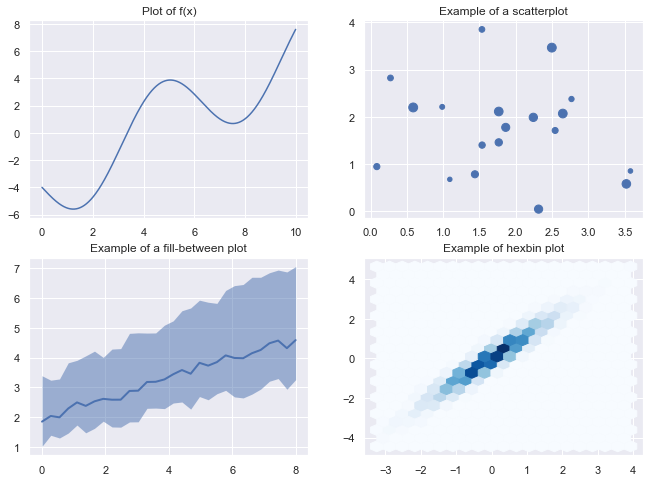

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(11, 8))

# Πρώτο γράφημα
axes[0][0].plot(x, f(x))
axes[0][0].set_title("Plot of f(x)")

# Δεύτερο γράφημα
axes[0][1].scatter(x_2, y_2, s=sizes,vmin=0, vmax=100) # <- προσθέστε εδώ το argument c=colors για να παίξετε με το χρώμα
axes[0][1].set_title("Example of a scatterplot")

# Τρίτο γράφημα
axes[1][0].fill_between(x_3, y_3_down, y_3_up, alpha=.5, linewidth=0)
axes[1][0].plot(x_3, (0.35*y_3_down + 0.65*y_3_up), linewidth=2)
axes[1][0].set_title("Example of a fill-between plot")

# Τέταρτο γράφημα
axes[1][1].hexbin(x_4, y_4, gridsize=20, cmap='Blues') # <- gridsize = μέγεθος εξαγώνου
axes[1][1].set_title("Example of hexbin plot")

plt.show()

Είτε το πιστεύετε είτε όχι, κάπου εδώ κλείνει η εισαγωγή στα visualizations χρησιμοποιώντας τη βιβλιοθήκη matplotlib. Ένας εκτενής οδηγός με όλα τα πιθανά ορίσματα κάθε μεθόδου ή συνάρτησης θα αναγόταν απλά σε ένα δευτερεύον documentation, το οποίο δεν είναι ο σκοπός αυτής της εισαγωγικής κουβέντας. Αντιθέτως, εστιάσαμε στα βασικά δομικά στοιχεία κάθε γραφήματος και τις δύο βασικές προσεγγίσεις στην απεικόνιση, ούτως ώστε όταν βρίσκετε έτοιμο κώδικα online ή όταν προσπαθείτε να κατασκευάσετε κάτι από το μηδέν, να μπορείτε να καταλάβετε τι κάνετε, χωρίς να θυμάστε απαραίτητα όλα τα ονόματα όλων των διαφορετικών plots, ή όλα τα ορίσματα κάθε μεθόδου.

Αναλυτικά tutorials με περισσότερες πληροφορίες σχετικά με τα είδη των plots, το design, κτλ. μπορείτε να βρείτε στην επίσημη σελίδα της βιβλιοθήκης, [εδώ](https://matplotlib.org/stable/tutorials/index.html). Για αρχή, συνιστούμε το tutorial με τίτλο [Basic Usage](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py) το οποίο περιγράφει όσα συζητήσαμε εδώ (κάποια λιγότερο και κάποια άλλα πιο αναλυτικά), καθώς και τα tutorials στην ενότητα [Colors](https://matplotlib.org/stable/tutorials/index.html#colors), ενώ σε δεύτερη φάση το tutorial με τίτλο [Artist tutorial](https://matplotlib.org/stable/tutorials/intermediate/artists.html#sphx-glr-tutorials-intermediate-artists-py). 

### Μέρος ΙV - Λίγα λόγια για το Seaborn

Όπως αναφέρθηκε και στην εισαγωγή, η βιβλιοθήκη Seaborn αποτελεί στην ουσία μια επέκταση της matplotlib, με στόχο την κατασκευή πιο εξειδικευμένων, αισθητικά ανώτερων γραφημάτων, σε ό,τι έχει να κάνει κυρίως με δεδομένα που χρησιμοποιούνται σε ή προκύπτουν από στατιστικές αναλύσεις. Ακριβώς για αυτόν το λόγο, οι μέθοδοι και οι συναρτήσεις της βιβλιοθήκης seaborn μπορούν (χωρίς αυτό να είναι απαραίτητο) να λάβουν σχεδόν πάντα ως όρισμα ένα αντικείμενο `data`, το οποίο είναι κάτι ισοδύναμο με python dictionary (ή, αντίστοιχα, Pandas dataframe). Με τον τρόπο αυτό, διευκολύνεται σημαντικά η κλήση των σχετικών μεθόδων και σύνθετα γραφήματα μπορούν να κατασκευαστούν γράφοντας μία μόλις γραμμή.

Ο τρόπος με τον οποίο κατασκευάζεται ένα seaborn plot είναι αρκετά παρόμοιος με αυτούς που είδαμε για την περίπτωση του matplotlib, τηρουμένων βέβαια πάντα των αναλογιών. Στο ακόλουθο παράδειγμα, αφότου φορτώσουμε τη βιβλιοθήκη και θέσουμε το θέμα σε `darkgrid`, δείχνουμε το παράδειγμα ενός plot το οποίο θυμίζει το fill-between plot που είδαμε παραπάνω. Σημειώνουμε πως τα «θέματα» αποτελούν στην ουσία συλλογές από συγκεκριμένες επιλογές (π.χ. background των γραφημάτων, ύπαρξη grid, κ.α.) οι οποίες μπορούν να κληθούν μέσα από μια γραμμή, φορτώνοντας όμως παράλληλα δεκάδες ή και εκατοντάδες επιλογές μονομιάς. Πέρα από τα built-in θέματα των seaborn και matplotlib, μπορεί κανείς να ορίσει το δικό του custom θέμα, αν και αυτό είναι κάτι πιο εξειδικευμένο από αυτά που μελετούμε στο παρόν notebook.

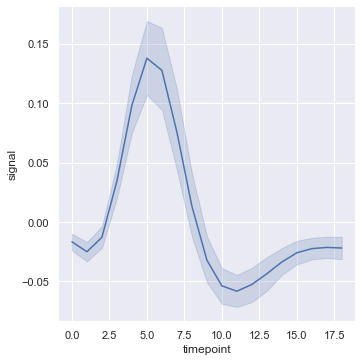

In [12]:
import seaborn as sns

# επιλογή του θέματος darkgrid
sns.set_theme(style="darkgrid")

# εδώ φορτώνουμε ένα έτοιμο dataset, το οποίο έρχεται μαζί με τη βιβλιοθήκη seaborn, για να το χρησιμοποιήσουμε
# καθαρά στα πλαίσια του παραδείγματός μας, χωρίς να χρειαστεί να φτιάξουμε νέα mock δεδομένα «με το χέρι»
data_points = sns.load_dataset("fmri")

# κλήση της συνάρτησης που θα μας δώσει το fill-between plot
sns.relplot(x="timepoint", y="signal", kind="line", data=data_points)

# χρήση της γνωστής show() για την απεικόνιση
plt.show()

Βλέπουμε πως με μία μόλις γραμμή, το seaborn μας κατασκευάζει ένα fill-between plot για τα δεδομένα με τα οποία το τροφοδοτήσαμε, το οποίο είναι και αισθητικά ανώτερο όσων είδαμε πιο πριν, λόγω της επιλογής συγκεκριμένου θέματος, καθώς και λόγω του ότι το seaborn διαβάζει αυτόματα πληροφορίες όπως τα ονόματα των αξόνων.

Γενικά, συνηθίζεται από ένα σημείο και μετά το seaborn να είναι μονόδρομος σε πολλές εφαρμογές, λόγω της υψηλής αισθητικής του, της ευκολίας στη χρήση και στο πλήθος των παραμέτρων και των επιλογών των συναρτήσεων και των μεθόδων του. Παρ' όλα αυτά, είναι σημαντικό κανείς να ξεκινήσει χρησιμοποιώντας «σκέτη» τη matplotlib, ώστε να εξοικειωθεί με τις βασικές έννοιές της πριν προχωρήσει στην πιο εξειδικευμένη version, δηλαδή το seaborn. Αυτό, διότι ακόμα και σε seaborn plots χρειάζεται συχνά η ανθρώπινη παρέμβαση για την προσθήκη επιπλέον επιλογών, ή τη διόρθωση πραγμάτων που το seaborn μπαίνει αυτόματα, και προϋπόθεση για αυτό είναι η γνώση του «τι συμβαίνει από πίσω». Και όπως είπαμε, πίσω από το seaborn βρίσκεται η matplotlib.

Κλείνοντας το σύντομο αυτό οδηγό, παραθέτουμε την [επίσημη σελίδα](https://seaborn.pydata.org/tutorial.html) όπου αναγράφεται αναλυτικά το documentation της βιβλιοθήκης seaborn. Ένας χρήστης εξοικειωμένος με τις θεμελιώδεις έννοιες της matplotlib και με κάποια εμπειρία σε γραφήματα, μπορεί με ευκολία να το διαβάσει και να κάνει ανά πάσα στιγμή το επόμενο βήμα.